In [166]:
from keras.models import Sequential, Input, Model, load_model
from keras.layers import Dense, Flatten, Reshape
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED'] = '0'
seed = 123
rn.seed(seed)
np.random.seed(seed)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
from keras import backend as K
tf.set_random_seed(seed)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [167]:
train = pd.read_csv('../train.csv')
label = train.label
train = train.drop(['label'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(train, label, test_size=0.2, shuffle=True, random_state=seed)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=seed)
x_train = x_train.values.astype('float32') / 255.0
x_val = x_val.values.astype('float32') / 255.0
y_train = y_train.values
y_val = y_val.values
#x_val = x_test.astype('float32') / 255.0
# Y_train = np_utils.to_categorical(Y_train, 10)
# Y_test = np_utils.to_categorical(Y_test, 10)
[x_train.shape, x_val.shape]

[(33600, 784), (8400, 784)]

In [168]:
y_val.dtype

dtype('int64')

In [169]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
Y_train = Y_train.astype('int64')
Y_test = Y_test.astype('int64')
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)
# x_val.shape

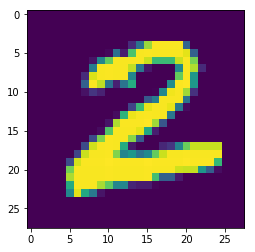

In [170]:
plt.imshow(x_train[0].reshape(28,28))

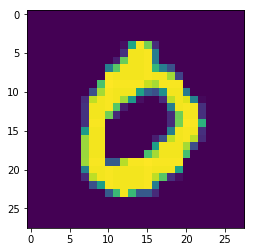

In [171]:
plt.imshow(X_test[3].reshape(28,28))

In [172]:
initializer = keras.initializers.glorot_uniform(seed=seed)

# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=initializer))
# model.add(Dropout(0.2, seed=seed))
# model.add(Dense(256, activation='relu', kernel_initializer=initializer))
# model.add(Dropout(0.2, seed=seed))
# model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model = Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))

model.add(Conv2D(32, (5,5),padding='same', activation='relu', kernel_initializer=initializer))
model.add(Conv2D(32, (5,5),padding='same', activation='relu', kernel_initializer=initializer))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25, seed=seed))
model.add(Conv2D(64, (3,3),padding = 'same', activation ='relu', kernel_initializer=initializer))
model.add(Conv2D(64, (3,3),padding = 'same', activation ='relu', kernel_initializer=initializer))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25, seed=seed))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.5, seed=seed))
model.add(Dense(64, activation = "relu", kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.5, seed=seed))
model.add(Dense(10, activation = "softmax", kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=1e-5,verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
ck_val_loss = ModelCheckpoint(filepath='ck_val_loss.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
ck_val_acc = ModelCheckpoint(filepath='ck_val_acc.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
ck_loss = ModelCheckpoint(filepath='ck_loss.hdf5', monitor='loss', verbose=1, save_best_only=True)
ck_acc = ModelCheckpoint(filepath='ck_acc.hdf5', monitor='acc', verbose=1, save_best_only=True)

hist = model.fit(x_train, 
                 y_train, 
                 epochs=50, 
                 batch_size=32,
                 validation_split=0.2,
                 #validation_data=(x_val, y_val),
                 #shuffle=False,
                 verbose=1, 
                 callbacks=[reduce_lr, early_stopping, ck_val_loss, ck_val_acc, ck_loss, ck_acc])

Train on 26880 samples, validate on 6720 samples
Epoch 1/50
26880/26880 [==============================] - 15s 557us/step - loss: 0.5105 - acc: 0.8444 - val_loss: 0.1176 - val_acc: 0.9629

Epoch 00001: val_loss improved from inf to 0.11757, saving model to ck_val_loss.hdf5

Epoch 00001: val_acc improved from -inf to 0.96295, saving model to ck_val_acc.hdf5

Epoch 00001: loss improved from inf to 0.51053, saving model to ck_loss.hdf5

Epoch 00001: acc improved from -inf to 0.84438, saving model to ck_acc.hdf5
Epoch 2/50
26880/26880 [==============================] - 10s 390us/step - loss: 0.1577 - acc: 0.9556 - val_loss: 0.0569 - val_acc: 0.9821

Epoch 00002: val_loss improved from 0.11757 to 0.05693, saving model to ck_val_loss.hdf5

Epoch 00002: val_acc improved from 0.96295 to 0.98214, saving model to ck_val_acc.hdf5

Epoch 00002: loss improved from 0.51053 to 0.15772, saving model to ck_loss.hdf5

Epoch 00002: acc improved from 0.84438 to 0.95558, saving model to ck_acc.hdf5
Epoch 3

In [173]:
val_loss_model = load_model('ck_val_loss.hdf5')
val_acc_model = load_model('ck_val_acc.hdf5')
loss_model = load_model('ck_loss.hdf5')
acc_model = load_model('ck_acc.hdf5')

# val_loss_res = val_loss_model.evaluate(x_val, y_val, verbose=1)
# val_acc_res = val_acc_model.evaluate(x_val, y_val, verbose=1)
# loss_res = loss_model.evaluate(x_val, y_val, verbose=1)
# acc_res = acc_model.evaluate(x_val, y_val, verbose=1)
# res = model.evaluate(x_val, y_val, verbose=1)

val_loss_res = val_loss_model.evaluate(X_train, Y_train, verbose=1)
val_acc_res = val_acc_model.evaluate(X_train, Y_train, verbose=1)
loss_res = loss_model.evaluate(X_train, Y_train, verbose=1)
acc_res = acc_model.evaluate(X_train, Y_train, verbose=1)
res = model.evaluate(X_train, Y_train, verbose=1)

60000/60000 [==============================] - 9s 158us/step


In [174]:
print('val_loss:', '{0:.8f}'.format(val_loss_res[0]), val_loss_res[1])#:
print(' val_acc:', '{0:.8f}'.format(val_acc_res[0]), val_acc_res[1])  #:
print('    loss:', '{0:.8f}'.format(loss_res[0]), loss_res[1])        #:1
print('     acc:', '{0:.8f}'.format(acc_res[0]), acc_res[1])          #:1
print('     res:', '{0:.8f}'.format(res[0]), res[1])                  #:
print('    hist:', '{0:.8f}'.format(np.min(hist.history['val_loss'])), np.max(hist.history['val_acc']))

val_loss: 0.01793745 0.9947666666666667
 val_acc: 0.01803323 0.9950333333333333
    loss: 0.01702244 0.9951333333333333
     acc: 0.01702244 0.9951333333333333
     res: 0.01702244 0.9951333333333333
    hist: 0.02133617 0.9938988095238095


In [185]:
pred1 = model.predict(X_test, verbose=1)

10000/10000 [==============================] - 2s 152us/step


In [186]:
res1 = pred1.argmax(axis=1)
res1

array([7, 2, 1, ..., 4, 5, 6])

In [190]:
test = pd.read_csv('../test.csv')
test_index = test.index
test = test.values.astype('float32') / 255.0

pred = model.predict(test, verbose=1)
result = pred.argmax(axis=1)

28000/28000 [==============================] - 4s 150us/step


In [191]:
submission = pd.DataFrame({'ImageId': test_index+1, 'Label': result})
submission.to_csv('comp_submission.csv', index=False)

In [192]:
prev_cnn = pd.read_csv('../cnn_submission.csv', index_col=0)
res = pd.read_csv('comp_submission.csv', index_col=0)
diff_num = np.sum(prev_cnn.Label.values != res.Label.values)
acc = (len(res) - diff_num) / len(res) * 0.998276
print('Approx. accuracy: {0:.5f}'.format(acc))

Approx. accuracy: 0.99393


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10,  17,  17,  17,  17,  81, 180, 180,
        35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 139, 253, 253, 253, 253, 253,
       253, 253,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 228, 253, 25

In [ ]:
pred2 = model.predict()

In [181]:
# val_loss: 0.01749513 0.9945
#  val_acc: 0.01761668 0.9944
#     loss: 0.01749513 0.9945
#      acc: 0.01749513 0.9945
#      res: 0.01726679 0.9947
#     hist: 0.02747315 0.9933333333333333

# val_loss: 0.01986853 0.9939
#  val_acc: 0.02089765 0.9943
#     loss: 0.02874065 0.9924
#      acc: 0.02874065 0.9924
#      res: 0.02874065 0.9924
#     hist: 0.03196515 0.9915

In [182]:
# plt.plot(hist.history['acc'], 'b-', label='Acc' )
# plt.plot(hist.history['loss'], 'r-', label='Loss' )
# plt.xlabel('epochs')
# plt.legend()
# plt.show()

In [183]:
result.shape

(28000,)